In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.pipeline import Pipeline

In [32]:
with open('df.pkl', 'rb') as f:
    df = pickle.load(f)
df

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,1,0,0,1,,do not buy really didn t start to wear them u...,2015,8
1,Teva Men's Pajaro Flip-Flop,5,0,0,1,super flip flop,provides great cushion as well as archsupport,2015,8
3,adidas Men's 10K Lifestyle Runner Sneaker,5,0,6,1,badass,getting what u see,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,3,0,0,1,three stars,small,2015,8
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),5,1,1,1,five stars,my 13 year old son loved these shoes excellent...,2015,8
...,...,...,...,...,...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,1,0,0,0,what a waste,i purchased this shoe because it looked good ...,2002,10
4358811,Women's Bree Suede Moc Snow Joggers,5,1,1,0,you want it you need it,this little shoe boot is so great if you re th...,2002,10
4358812,Women's CanvasMule Shoes,5,0,0,0,cute,the backless mule is very comfortable cute ...,2002,9
4358813,Birki's Super Birki Unisex Clog,5,10,11,0,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...,2002,3


In [3]:
with open('2ClassDf.pkl', 'rb') as f:
    df2 = pickle.load(f)
df2

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Minnetonka Men's Double Deerskin Softsole Mocc...,0,0,0,1,,do not buy really didn t start to wear them u...,2015,8
1,Teva Men's Pajaro Flip-Flop,1,0,0,1,super flip flop,provides great cushion as well as archsupport,2015,8
3,adidas Men's 10K Lifestyle Runner Sneaker,1,0,6,1,badass,getting what u see,2015,8
4,OverBling Sneakers for Men Casual Men Shoes Ge...,0,0,0,1,three stars,small,2015,8
5,MESSI 15.3 FG/AG SOCCER SHOES (8.5),1,1,1,1,five stars,my 13 year old son loved these shoes excellent...,2015,8
...,...,...,...,...,...,...,...,...,...
4358810,Women's Evette Mid-Shaft Boots,0,0,0,0,what a waste,i purchased this shoe because it looked good ...,2002,10
4358811,Women's Bree Suede Moc Snow Joggers,1,1,1,0,you want it you need it,this little shoe boot is so great if you re th...,2002,10
4358812,Women's CanvasMule Shoes,1,0,0,0,cute,the backless mule is very comfortable cute ...,2002,9
4358813,Birki's Super Birki Unisex Clog,1,10,11,0,graceless and immense comfy and cool,my garden clogs make my feet look huge and ev...,2002,3


The first model that is to be performed is a logistic regression so multicollinearity should be checked.

C:\Users\mager\AppData\Local\Temp\ipykernel_20088\1259888513.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df2.corr())
C:\Users\mager\AppData\Local\Temp\ipykernel_20088\1259888513.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, mask=matrix, cmap='coolwarm')


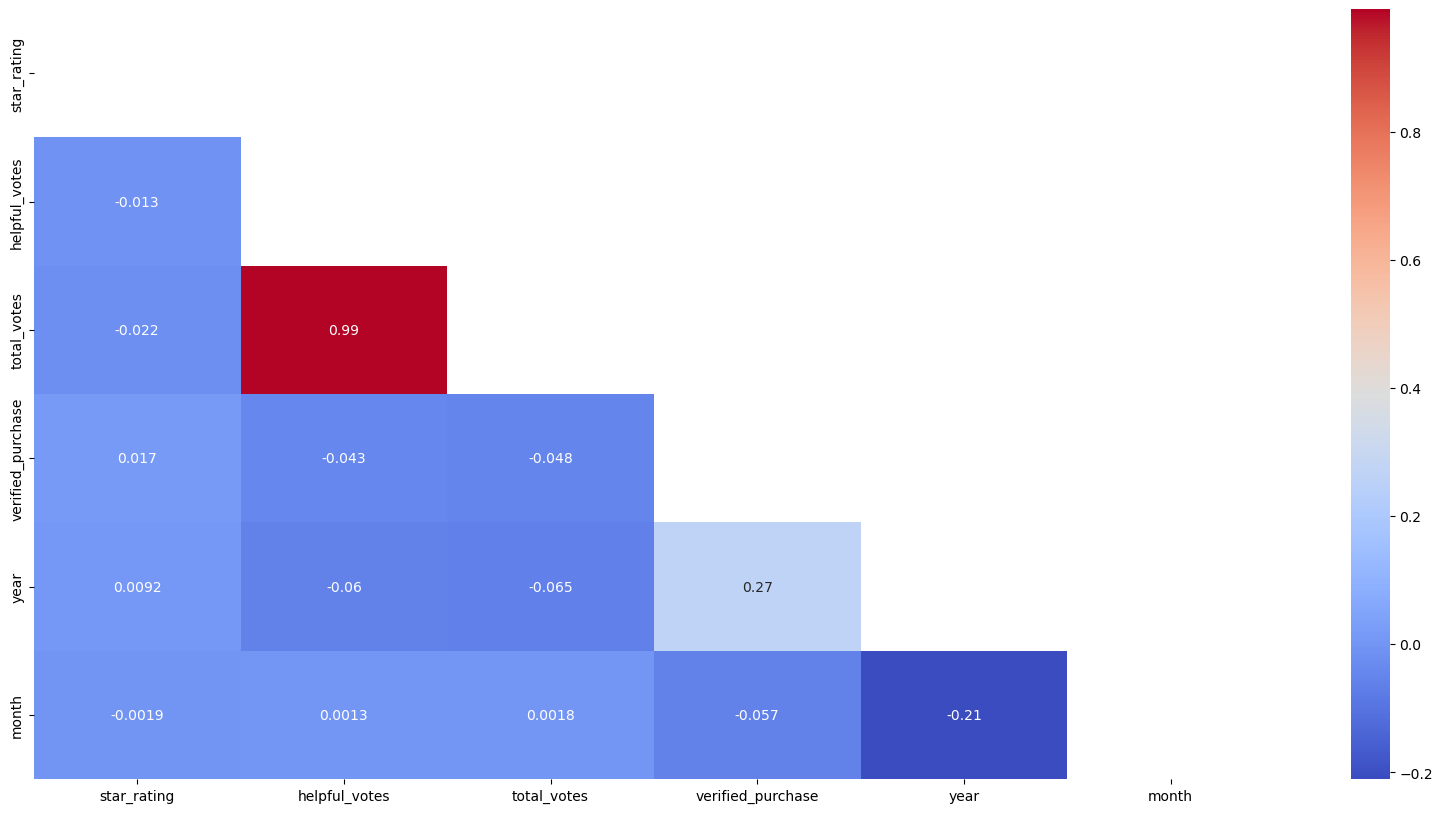

In [4]:
# Correlation of the variables in a heatmap
plt.figure(figsize=(20, 10))
matrix = np.triu(df2.corr())
sns.heatmap(df2.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

`total_votes` and `helpful_votes` are highly correlated with each other so one of them will need to be dropped. In this case, it will be `total_votes` since helpful_votes seem more useful.

In [5]:
sampled_df = df2.sample(50000, random_state=1).reset_index(drop=True)
sampled_df

,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,year,month
0,Kickers Men's Jojo Lace-Up Sneaker,1,0,0,1,amazing and so nice one i like kickers but thi...,amazing and so nice one br i like kickers bu...,2014,8
1,Madden Men's M-Gamer Boat Shoe,0,1,1,1,nice shoes,i always buy steve madden always fits perfect...,2013,10
2,Teva Women's Kiru Outdoor Clog,1,0,0,1,my favorite shoes,i love the deep moss green color as it matches...,2014,1
3,Lamo Men's Moc Moccasin,0,10,10,1,quality not so sure,at first they were great comfortable soft k...,2011,3
4,ECCO Men's Track IV Top Stitch High (Rust Leat...,1,0,0,1,outstanding,very comfortable right out of the box good s...,2008,10
...,...,...,...,...,...,...,...,...,...
49995,Easy Spirit Women's Traveltime Mule,1,4,5,0,easy spirit mule,love my easy spirit mules so comfortable and ...,2011,9
49996,"Women's Clarks, Pause Majesty Ankle Boot",0,2,2,1,color lies,this is not the color that i received the col...,2014,8
49997,adidas Men's Kanadia Trail 2 Trail Running Shoe,0,1,2,1,great shoes but not as good as the 1st gen ka...,i love the kanadias by adidas i have owned th...,2010,7
49998,Vasque Women's Inhaler Hiking Boot,1,2,2,1,great boots but order a half size up,had to exchange for a half size up from my usu...,2015,7


In [6]:
sampled_df.drop(columns='total_votes')

,product_title,star_rating,helpful_votes,verified_purchase,review_headline,review_body,year,month
0,Kickers Men's Jojo Lace-Up Sneaker,1,0,1,amazing and so nice one i like kickers but thi...,amazing and so nice one br i like kickers bu...,2014,8
1,Madden Men's M-Gamer Boat Shoe,0,1,1,nice shoes,i always buy steve madden always fits perfect...,2013,10
2,Teva Women's Kiru Outdoor Clog,1,0,1,my favorite shoes,i love the deep moss green color as it matches...,2014,1
3,Lamo Men's Moc Moccasin,0,10,1,quality not so sure,at first they were great comfortable soft k...,2011,3
4,ECCO Men's Track IV Top Stitch High (Rust Leat...,1,0,1,outstanding,very comfortable right out of the box good s...,2008,10
...,...,...,...,...,...,...,...,...
49995,Easy Spirit Women's Traveltime Mule,1,4,0,easy spirit mule,love my easy spirit mules so comfortable and ...,2011,9
49996,"Women's Clarks, Pause Majesty Ankle Boot",0,2,1,color lies,this is not the color that i received the col...,2014,8
49997,adidas Men's Kanadia Trail 2 Trail Running Shoe,0,1,1,great shoes but not as good as the 1st gen ka...,i love the kanadias by adidas i have owned th...,2010,7
49998,Vasque Women's Inhaler Hiking Boot,1,2,1,great boots but order a half size up,had to exchange for a half size up from my usu...,2015,7


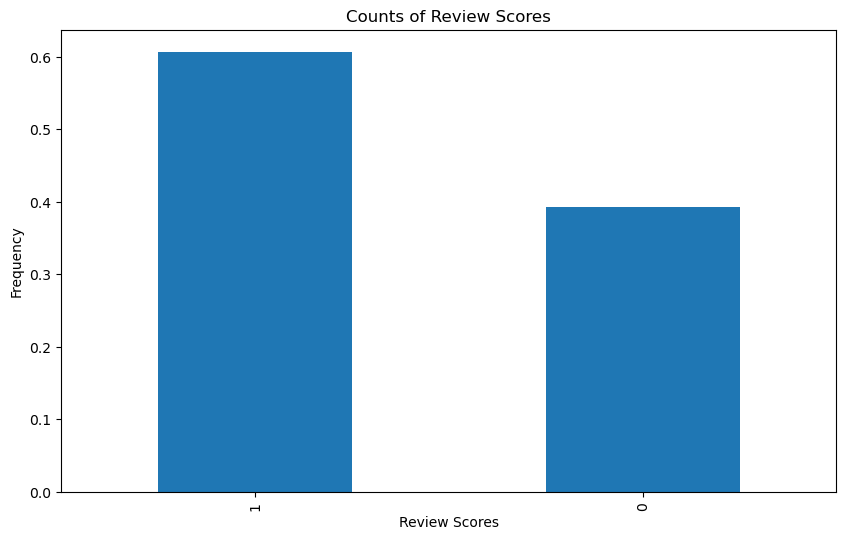

In [7]:
# Sanity check
figure = plt.figure(figsize=(10,6))
sampled_df['star_rating'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.title('Counts of Review Scores')
plt.show()

After sampling, the classes distribution are still the same. Thus, the first model can be performed which is logistic regression.

#### Train/Test Split

In [8]:
# import the library needed to split
from sklearn.model_selection import train_test_split

# assigning Reviewer_Score as target variable and everything else as X 
X_sample = sampled_df.drop(columns=['star_rating'])
y_sample = sampled_df['star_rating']

# splitting the data 
X_sample_remainder, X_sample_test, y_sample_remainder, y_sample_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=1, stratify=y_sample)

In [9]:
# Creating a validation set
X_sample_train, X_sample_valid, y_sample_train, y_sample_valid = train_test_split(X_sample_remainder, y_sample_remainder, test_size=0.3, random_state=1, stratify=y_sample_remainder)

#### Vectorization

The `review_body` and `review_headline` need to be vectorized so there is only numeric columns before modeling can be done. For vectorizing, bag of words will be used.

In [13]:
X_train_review_sample = X_sample_train['review_body']
X_valid_review_sample = X_sample_valid['review_body']
X_test_review_sample = X_sample_test['review_body']

In [14]:
sampled_df = sampled_df.drop(columns=['product_title', 'review_headline', 'review_body'])

In [15]:
%%time
# Instantiate
stemmer = PorterStemmer()

bag_body = CountVectorizer(stop_words="english", min_df=250)

# Fitting 
bag_body.fit(X_train_review_sample)

# Transform
train_sample_bag = bag_body.transform(X_train_review_sample)
valid_sample_bag = bag_body.transform(X_valid_review_sample)
test_sample_bag = bag_body.transform(X_test_review_sample)

CPU times: total: 2.7 s
Wall time: 3.5 s


In [16]:
train_sample_bag

<28000x319 sparse matrix of type '<class 'numpy.int64'>'
	with 285247 stored elements in Compressed Sparse Row format>

In [17]:
X_train_headline_sample = X_sample_train['review_headline']
X_valid_headline_sample = X_sample_valid['review_headline']
X_test_headline_sample = X_sample_test['review_headline']

In [18]:
%%time
# Instantiate
stemmer = PorterStemmer()

bag_headline = CountVectorizer(stop_words="english", min_df=50)

# Fitting 
bag_headline.fit(X_train_headline_sample)

# Transform
train_sample_headline = bag_headline.transform(X_train_headline_sample)
valid_sample_headline = bag_headline.transform(X_valid_headline_sample)
test_sample_headline = bag_headline.transform(X_test_headline_sample)

CPU times: total: 641 ms
Wall time: 840 ms


In [19]:
bag_headline.get_feature_names_out()

array(['10', 'absolutely', 'adorable', 'amazing', 'amazon', 'arch',
       'asics', 'awesome', 'bad', 'bag', 'balance', 'beautiful', 'best',
       'better', 'big', 'bigger', 'bit', 'black', 'boot', 'boots',
       'bought', 'box', 'brand', 'buy', 'casual', 'cheap', 'clarks',
       'color', 'comfort', 'comfortable', 'comfy', 'cool', 'crocs',
       'cute', 'daughter', 'day', 'design', 'did', 'didn', 'disappointed',
       'does', 'don', 'durable', 'easy', 'em', 'excellent', 'expected',
       'extremely', 'fantastic', 'far', 'fast', 'favorite', 'feel',
       'feet', 'fine', 'fit', 'fits', 'flat', 'flip', 'flop', 'flops',
       'foot', 'fun', 'gift', 'good', 'gorgeous', 'got', 'great', 'half',
       'happy', 'hard', 'heel', 'high', 'husband', 'just', 'large',
       'larger', 'leather', 'light', 'like', 'little', 'long', 'look',
       'looking', 'looks', 'lot', 'love', 'loved', 'loves', 'men',
       'money', 'narrow', 'need', 'new', 'nice', 'ok', 'okay', 'old',
       'order', 'or

In [20]:
# importing library to deal with sparse matrix
import scipy.sparse as sp

# combining headline and bag counts
train_count = sp.hstack([train_sample_headline, train_sample_bag])
valid_count = sp.hstack([valid_sample_headline, valid_sample_bag])
test_count = sp.hstack([test_sample_headline, test_sample_bag])

In [21]:
train_count

<28000x490 sparse matrix of type '<class 'numpy.int64'>'
	with 331790 stored elements in Compressed Sparse Row format>

In [22]:
body_words = bag_body.get_feature_names_out()
tagged_body_words = ['b_' + feature for feature in body_words]
headline_words = bag_headline.get_feature_names_out()
tagged_headline_words = ['h_' + feature for feature in headline_words]
sample_vocab = tagged_headline_words + tagged_body_words

In [23]:
len(sample_vocab)

490

In [24]:
train_count

<28000x490 sparse matrix of type '<class 'numpy.int64'>'
	with 331790 stored elements in Compressed Sparse Row format>

In [25]:
train_df = pd.DataFrame(train_count.toarray(), columns=sample_vocab)
valid_df = pd.DataFrame(valid_count.toarray(), columns=sample_vocab)
test_df = pd.DataFrame(test_count.toarray(), columns=sample_vocab)

In [26]:
X_sample_train = X_sample_train.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_sample_valid = X_sample_valid.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])
X_sample_test = X_sample_test.reset_index(drop=True).drop(columns=['product_title', 'review_headline', 'review_body'])

In [27]:
combined_train = pd.concat([X_sample_train, train_df], axis=1)
combined_valid = pd.concat([X_sample_valid, valid_df], axis=1)
combined_test = pd.concat([X_sample_test, test_df], axis=1)

In [28]:
combined_train

,helpful_votes,total_votes,verified_purchase,year,month,h_10,h_absolutely,h_adorable,h_amazing,h_amazon,...,b_won,b_wonderful,b_wore,b_work,b_worn,b_worth,b_wouldn,b_wrong,b_year,b_years
0,0,0,1,2014,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,2015,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,2015,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0,2008,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2014,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,1,1,0,2007,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,1,2014,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,6,8,1,2013,10,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
27998,0,0,1,2014,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Instantiate
ss = StandardScaler()

# Fit and tranform
X_train_scaled = ss.fit_transform(combined_train)
X_valid_scaled = ss.transform(combined_valid)
X_test_scaled = ss.transform(combined_test)

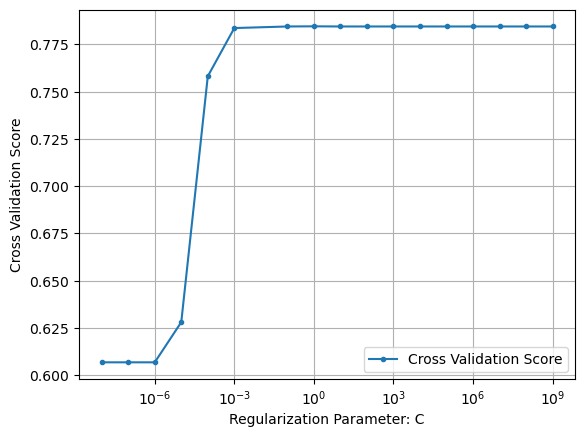

The best model has C =  1.0


In [36]:
scores = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    log = LogisticRegression(C=c,random_state=1)
    log.fit(X_train_scaled, y_sample_train)
    scores.append(log.score(X_valid_scaled, y_sample_valid))
    
plt.figure()
plt.plot(C_range, scores, label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(scores).argmax()

print("The best model has C = ",C_range[which_max])

In [37]:
log = LogisticRegression(C=1,random_state=1)
log.fit(X_train_scaled, y_sample_train)
log.score(X_test_scaled, y_sample_test)

0.7792

Test accuracy with best hyperparameters is 77.92%. Confusion matrix and classification report should be looked at next to see other metrics.  

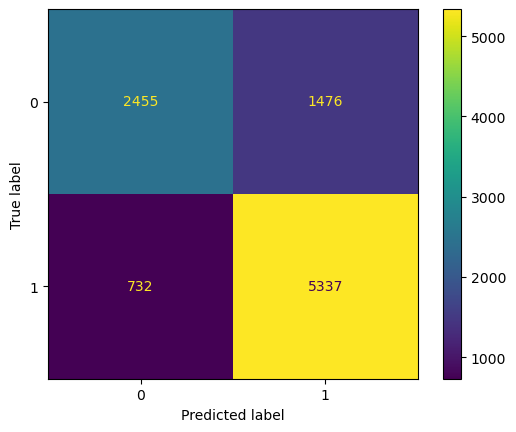

In [62]:
ConfusionMatrixDisplay.from_estimator(log, X_test_scaled, y_sample_test);

In [42]:
# Get rating predictions
y_pred = log.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_sample_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1"],
    index=["True 0", "True 1"]
)
display(cf_df)

print(classification_report(y_sample_test, y_pred))

,Predicted 0,Predicted 1
True 0,2455,1476
True 1,732,5337


              precision    recall  f1-score   support

           0       0.77      0.62      0.69      3931
           1       0.78      0.88      0.83      6069

    accuracy                           0.78     10000
   macro avg       0.78      0.75      0.76     10000
weighted avg       0.78      0.78      0.77     10000



Looking at the classification report, the class imbalance seems to affecting the predictions since recall is 62% so 38% of actual review is being predicted as 1 whereas the recall for 1 is 88%. A difference of 16%.

Looks like the best parameter for C for `lbfgs` was with C=1, with a test score accuracy of 77.92%.

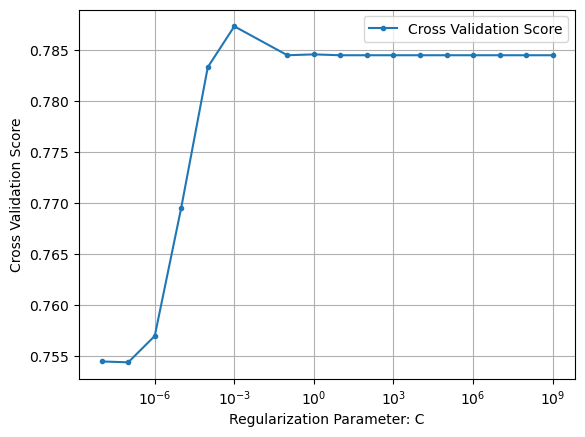

The best model has C =  0.001


In [53]:
scores = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    log = LogisticRegression(solver='liblinear', C=c, random_state=1)
    log.fit(X_train_scaled, y_sample_train)
    scores.append(log.score(X_valid_scaled, y_sample_valid))
    
plt.figure()
plt.plot(C_range, scores, label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(scores).argmax()

print("The best model has C = ",C_range[which_max])

In [56]:
log2 = LogisticRegression(solver='liblinear', C=0.001, random_state=1)
log2.fit(X_train_scaled, y_sample_train)
log2.score(X_test_scaled, y_sample_test)

0.7795

A solver of `liblinear` with C=0.001 had a test score of 77.95%, an increase of 0.03% compared to the previous solver. 

Test accuracy with best hyperparameters is 77.92%. Confusion matrix and classification report should be looked at next to see other metrics.  

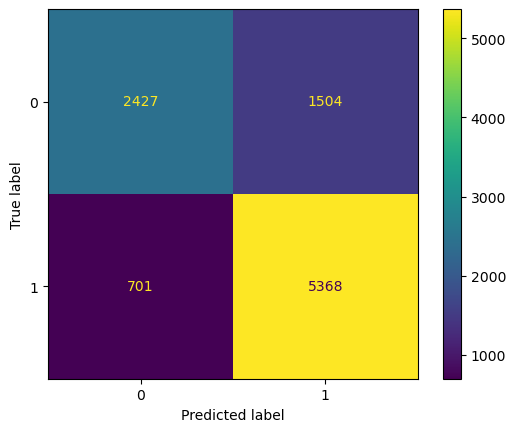

In [63]:
ConfusionMatrixDisplay.from_estimator(log2, X_test_scaled, y_sample_test);

In [64]:
# Get rating predictions
y_pred = log2.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_sample_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1"],
    index=["True 0", "True 1"]
)
display(cf_df)

print(classification_report(y_sample_test, y_pred))

,Predicted 0,Predicted 1
True 0,2427,1504
True 1,701,5368


              precision    recall  f1-score   support

           0       0.78      0.62      0.69      3931
           1       0.78      0.88      0.83      6069

    accuracy                           0.78     10000
   macro avg       0.78      0.75      0.76     10000
weighted avg       0.78      0.78      0.77     10000



The results are similar to the `lbfgs` model with a 1% difference in precision for 0. The rest seems to be the same.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 38 epochs took 5 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 31 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 36 epochs took 4 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 119 epochs took 14 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1802 epochs took 22663 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 377.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2207 epochs took 267 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2260 epochs took 309 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2267 epochs took 277 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2267 epochs took 275 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2267 epochs took 275 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2267 epochs took 270 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2267 epochs took 279 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2267 epochs took 276 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2267 epochs took 278 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2267 epochs took 272 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.5min finished


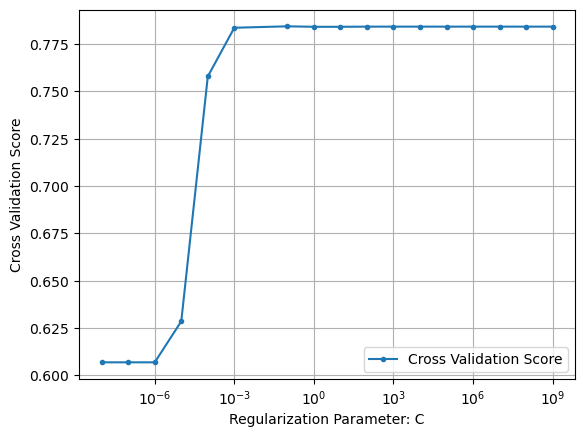

The best model has C =  0.1
CPU times: total: 50min 43s
Wall time: 7h 4min 43s


In [75]:
%%time
scores = []
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    log = LogisticRegression(solver='saga', C=c, random_state=1, max_iter=10000, verbose=1)
    log.fit(X_train_scaled, y_sample_train)
    scores.append(log.score(X_valid_scaled, y_sample_valid))
    
plt.figure()
plt.plot(C_range, scores, label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(scores).argmax()

print("The best model has C = ",C_range[which_max])

In [79]:
log3 = LogisticRegression(solver='liblinear', C=0.1, random_state=1)
log3.fit(X_train_scaled, y_sample_train)
log3.score(X_test_scaled, y_sample_test)

0.7801

Test accuracy with best hyperparameters is 78.01%. Confusion matrix and classification report should be looked at next to see other metrics.  

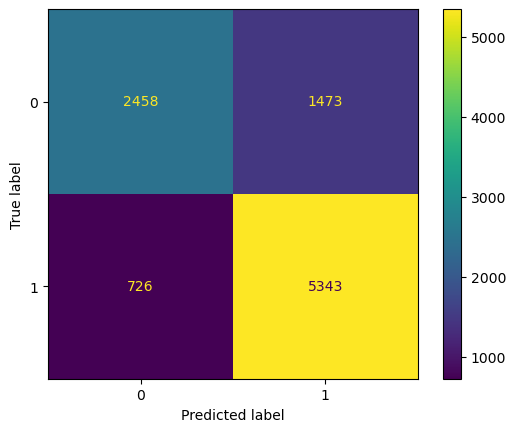

In [80]:
ConfusionMatrixDisplay.from_estimator(log3, X_test_scaled, y_sample_test);

In [81]:
# Get rating predictions
y_pred = log3.predict(X_test_scaled)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_sample_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1"],
    index=["True 0", "True 1"]
)
display(cf_df)

print(classification_report(y_sample_test, y_pred))

,Predicted 0,Predicted 1
True 0,2458,1473
True 1,726,5343


              precision    recall  f1-score   support

           0       0.77      0.63      0.69      3931
           1       0.78      0.88      0.83      6069

    accuracy                           0.78     10000
   macro avg       0.78      0.75      0.76     10000
weighted avg       0.78      0.78      0.77     10000



In [ ]:
word_counts = pd.DataFrame({"counts":log.coef_[0]}, index=combined_train.columns).sort_values("counts", ascending=False)
word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 most predictive features of a good review")
plt.ylabel("coeff")
plt.xticks(rotation=45)
plt.show()

In [ ]:
word_counts = pd.DataFrame({"counts":log.coef_[0]}, index=combined_train.columns).sort_values("counts", ascending=True)
word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 30 most predictive features of a bad review")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### SVMS

In [ ]:
%%time
estimators = [('model', svm.SVC())]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [svm.SVC()],
             'model__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]},
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid = grid.fit(X_train_scaled, y_sample_train)

In [89]:
with open('SVM.pkl', 'wb') as f:
    pickle.dump(df, f)
# pickle.dump(fittedgrid, "SVM")

In [92]:
fittedgrid.best_score_

0.7871785714285714